In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Age and Sex

In [2]:
age_sex_df = pd.read_csv('../impacts_research_data\ACSST1Y2023.S0101-2024-10-18T052531.csv')

In [3]:
age_sex_df.head(5)

,Label (Grouping),"Imperial County, California!!Total!!Estimate","Imperial County, California!!Total!!Margin of Error","Imperial County, California!!Percent!!Estimate","Imperial County, California!!Percent!!Margin of Error","Imperial County, California!!Male!!Estimate","Imperial County, California!!Male!!Margin of Error","Imperial County, California!!Percent Male!!Estimate","Imperial County, California!!Percent Male!!Margin of Error","Imperial County, California!!Female!!Estimate","Imperial County, California!!Female!!Margin of Error","Imperial County, California!!Percent Female!!Estimate","Imperial County, California!!Percent Female!!Margin of Error"
0,Total population,"179,057",*****,(X),(X),"90,764",±877,(X),(X),"88,293",±877,(X),(X)
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years,"12,243",±387,6.8%,±0.2,"6,056",±296,6.7%,±0.3,"6,187",±284,7.0%,±0.3
3,5 to 9 years,"13,293","±2,081",7.4%,±1.2,"6,147","±1,406",6.8%,±1.6,"7,146","±1,483",8.1%,±1.7
4,10 to 14 years,"15,956","±1,944",8.9%,±1.1,"8,572","±1,247",9.4%,±1.4,"7,384","±1,459",8.4%,±1.7


##### Cleaning
The dataset is very messy. There are a lot of whitespaces and the integer values are actually all string values.

In [4]:
for col_name in age_sex_df.columns:
    age_sex_df[col_name] = age_sex_df[col_name].str.strip()

In [5]:
# renaming the columns for clarity
age_sex_df.columns = [
    'Group', 
    'Total', 
    'Total MoE', 
    'Total Percent Estimate', 
    'Total Percent MoE',
    'Total Male Estimate',
    'Total Male MoE',
    'Percent Male Estimate',
    'Percent Male MoE',
    'Total Female Estimate',
    'Total Female MoE',
    'Percent Female Estimate',
    'Percent Female MoE']

In [6]:
# changing the columns to their proper datatypes

In [7]:
age_sex_df.head(5)

,Group,Total,Total MoE,Total Percent Estimate,Total Percent MoE,Total Male Estimate,Total Male MoE,Percent Male Estimate,Percent Male MoE,Total Female Estimate,Total Female MoE,Percent Female Estimate,Percent Female MoE
0,Total population,"179,057",*****,(X),(X),"90,764",±877,(X),(X),"88,293",±877,(X),(X)
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years,"12,243",±387,6.8%,±0.2,"6,056",±296,6.7%,±0.3,"6,187",±284,7.0%,±0.3
3,5 to 9 years,"13,293","±2,081",7.4%,±1.2,"6,147","±1,406",6.8%,±1.6,"7,146","±1,483",8.1%,±1.7
4,10 to 14 years,"15,956","±1,944",8.9%,±1.1,"8,572","±1,247",9.4%,±1.4,"7,384","±1,459",8.4%,±1.7


In [8]:
def clean_int(input_str):
    return int("".join(input_str.split(',')))

def clean_percent(input_str):
    return int("".join(input_str[0:-1].split('.')))/10.0

def clean_percent_moe(input_str):
    return int("".join(input_str[1:].split('.')))/10.0

def clean_moe(input_str):
    return clean_int(input_str[1:])

In [9]:
filtered_age_sex_df = age_sex_df.iloc[2:20, :] # just looking at age-related information
filtered_age_sex_df = filtered_age_sex_df.reset_index(drop=True)

In [10]:
filtered_age_sex_df.tail(5) # filtered the groups are just X to Y years

,Group,Total,Total MoE,Total Percent Estimate,Total Percent MoE,Total Male Estimate,Total Male MoE,Percent Male Estimate,Percent Male MoE,Total Female Estimate,Total Female MoE,Percent Female Estimate,Percent Female MoE
13,65 to 69 years,"7,863","±1,070",4.4%,±0.6,"3,091",±681,3.4%,±0.8,"4,772",±695,5.4%,±0.8
14,70 to 74 years,"6,373","±1,042",3.6%,±0.6,"3,480",±690,3.8%,±0.8,"2,893",±643,3.3%,±0.7
15,75 to 79 years,"4,746","±1,052",2.7%,±0.6,"2,069",±610,2.3%,±0.7,"2,677",±669,3.0%,±0.8
16,80 to 84 years,"2,996",±871,1.7%,±0.5,"1,293",±618,1.4%,±0.7,"1,703",±619,1.9%,±0.7
17,85 years and over,"2,753",±896,1.5%,±0.5,"1,069",±535,1.2%,±0.6,"1,684",±626,1.9%,±0.7


In [11]:
for col_name in filtered_age_sex_df.columns:
    print(f'{col_name}: ', end = "")
    if 'MoE' in col_name:
        if 'Percent' in col_name:
            filtered_age_sex_df[col_name] = filtered_age_sex_df[col_name].apply(clean_percent_moe)
        else:
            filtered_age_sex_df[col_name] = filtered_age_sex_df[col_name].apply(clean_moe)
    elif 'Estimate' in col_name:
        if 'Percent' in col_name:
            filtered_age_sex_df[col_name] = filtered_age_sex_df[col_name].apply(clean_percent)
        else:
            filtered_age_sex_df[col_name] = filtered_age_sex_df[col_name].apply(clean_int)
    elif col_name == 'Total':
        filtered_age_sex_df[col_name] = filtered_age_sex_df[col_name].apply(clean_int)
    elif col_name == 'Total MoE':
        filtered_age_sex_df[col_name] = filtered_age_sex_df[col_name].apply(clean_moe)
    else:
        print('not cleaned')
        continue
    print('cleaned')

Group: not cleaned
Total: cleaned
Total MoE: cleaned
Total Percent Estimate: cleaned
Total Percent MoE: cleaned
Total Male Estimate: cleaned
Total Male MoE: cleaned
Percent Male Estimate: cleaned
Percent Male MoE: cleaned
Total Female Estimate: cleaned
Total Female MoE: cleaned
Percent Female Estimate: cleaned
Percent Female MoE: cleaned


In [12]:
cleaned_asdf = filtered_age_sex_df.copy(deep=True) # copying the cleaned data

In [13]:
# cleaned_asdf.to_csv('../impacts_research_data/cleaned_age.csv') # cleaned data

##### Plotting data for presentation

In [14]:
plt.style.use('fivethirtyeight')

In [15]:
colors_df = {}

for i in range(len(cleaned_asdf)):
    if i <= 7:
        colors_df[cleaned_asdf.iloc[i, 0]] = 'gray'
    else:
        colors_df[cleaned_asdf.iloc[i, 0]] = '#85ba50'

In [16]:
def clean_group(group):
    if 'over' in group.lower():
        return ">" + group.split(" ")[0]
    elif 'under' in group.lower():
        return "<" + group.split(" ")[1]
    else:
        group_lst = group.split(" ")
        return group_lst[0] + "-" + group_lst[2]


In [17]:
clean_group('35 to 39 years')

'35-39'

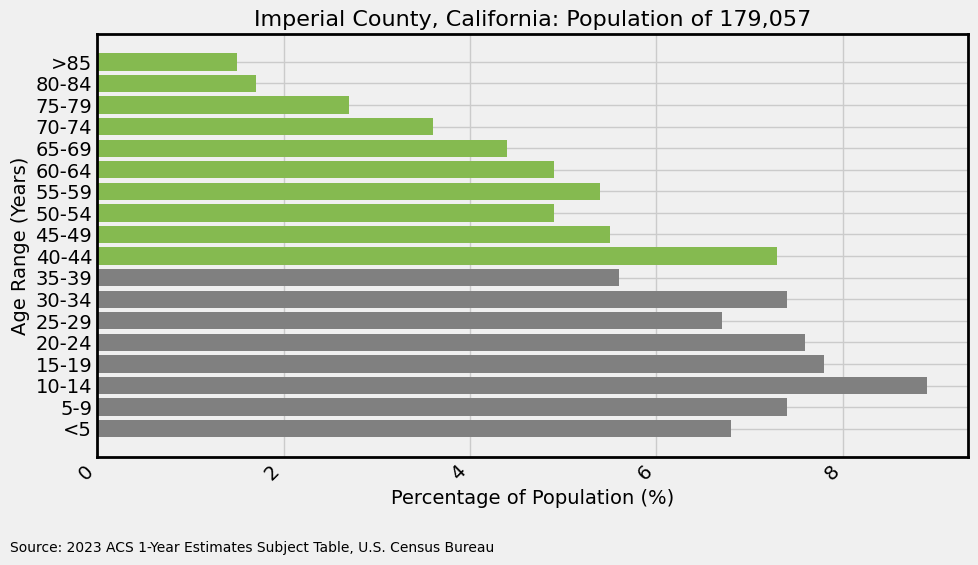

In [19]:
ages = cleaned_asdf['Group']
percents = cleaned_asdf['Total Percent Estimate']

fig, ax = plt.subplots(figsize=(10, 6))

colors = [colors_df[group] for group in ages]

ages = ages.apply(clean_group)

plt.barh(ages, percents, color=colors)

plt.title('Imperial County, California: Population of 179,057', fontsize=16)
plt.ylabel('Age Range (Years)', fontsize=14)

plt.xlabel('Percentage of Population (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.text(-0.1, -0.2, 'Source: 2023 ACS 1-Year Estimates Subject Table, U.S. Census Bureau', 
         transform=ax.transAxes, fontsize=10, va='top', ha='left')

plt.tight_layout()
plt.show()